In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from sklearn.cluster import KMeans

from rdkit import Chem,Geometry
from rdkit.Chem import rdmolfiles, AllChem, rdMolAlign,rdmolops, Descriptors, Draw

from collections import Counter
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
import numpy as np
import pandas as pd

In [11]:
#This calculates the molecular vectors from smiles strings
class ECFPCalculator:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def mol2fp(self, mol, radius = 3):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius = radius)
        array = np.zeros((1,))
        Chem.DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def compute_ECFP6(self, name):
        bit_headers = ['bit' + str(i) for i in range(2048)]
        arr = np.empty((0,2048), int).astype(int)
        for i in self.mols:
            fp = self.mol2fp(i)
            arr = np.vstack((arr, fp))
        df_ecfp6 = pd.DataFrame(np.asarray(arr).astype(int),columns=bit_headers)
        df_ecfp6.insert(loc=0, column='smiles', value=self.smiles)
        df_ecfp6.to_csv(name[:-4]+'_ECFP6.csv', index=False)

In [12]:
# Read the Excel file containing SMILES strings
df = pd.read_excel('UMAP_Test_Smiles.xlsx')

In [13]:
#Looks for a column named 'smiles' and converts it into a list
smiles_list = df['smiles'].tolist()

In [14]:
# Create an instance of the class with the SMILES strings
ecfp_calculator = ECFPCalculator(smiles_list)

In [15]:
# Specify the name of the output CSV file
output_csv_name = "ECFP_test_output.csv"

In [16]:
# Compute ECFP6 fingerprints and save the results to a CSV file
ecfp_calculator.compute_ECFP6(output_csv_name)

In [17]:
# Read the CSV file containing the ECFP6 fingerprints
df_ecfp6 = pd.read_csv("ECFP_test_output_ECFP6.csv")

In [18]:
# Verify the contents of the DataFrame
print(df_ecfp6.head())  # Display the first few rows of the DataFrame

                                              smiles  bit0  bit1  bit2  bit3  \
0  O=[N+](C(C=C6)=CN=C6C7=CC=C(N(C8=C9C=CC=C8)C%1...     0     0     0     0   
1  N#CC%11=CC(C%12=CC=C(N(C%13=C%14C=CC=C%13)C%15...     0     0     0     0   
2  N#CC%16=CC=C(C=C%16)C%17=CC=C(N(C%18=C%19C=CC=...     0     0     0     0   
3  CC(C(C=C%21)=CC=C%21C%22=CC=C(N(C%23=C%24C=CC=...     0     0     0     0   
4  CC(C(C=C%26)=CC([N+]([O-])=O)=C%26C%27=CC=C(N%...     0     0     0     0   

   bit4  bit5  bit6  bit7  bit8  ...  bit2038  bit2039  bit2040  bit2041  \
0     0     0     0     0     0  ...        0        0        0        0   
1     0     0     0     0     0  ...        0        0        0        0   
2     0     0     0     0     0  ...        0        0        0        0   
3     0     0     0     0     0  ...        0        0        0        0   
4     0     0     0     0     0  ...        0        0        0        0   

   bit2042  bit2043  bit2044  bit2045  bit2046  bit2047  
0   

In [19]:
# Select features for UMAP projection (ECFP6 fingerprints)
features = df_ecfp6.drop(columns=['smiles'])

In [20]:
from umap import UMAP

In [39]:
# Perform UMAP projection
umap = UMAP(n_components=2)  # Set the number of dimensions for projection
umap_projection = umap.fit_transform(features)

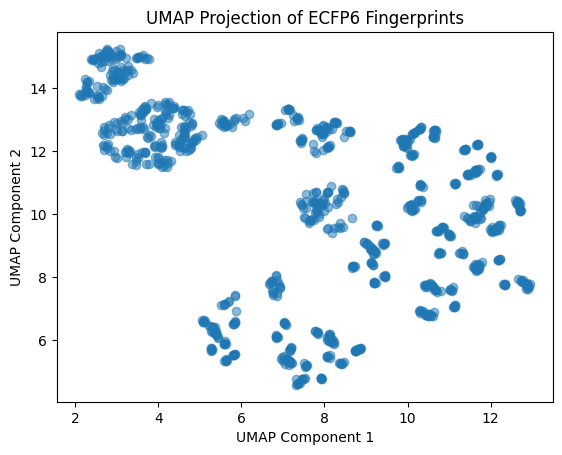

In [40]:
# Visualize the data
plt.scatter(umap_projection[:, 0], umap_projection[:, 1], alpha=0.5)
plt.title('UMAP Projection of ECFP6 Fingerprints')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [42]:
# Create a color map based on the indices you want to highlight
indices_to_highlight = [1,100, 802, 903, 104, 105, 306, 207, 308, 409, 501, 111, 212, 613, 814, 415, 616, 117, 118]  # Specify the indices you want to highlight
colors = ['red' if i in indices_to_highlight else 'blue' for i in range(len(df))]

In [44]:
# Perform UMAP projection
umap_model = UMAP(n_components=2)
umap_projection = umap_model.fit_transform(features)

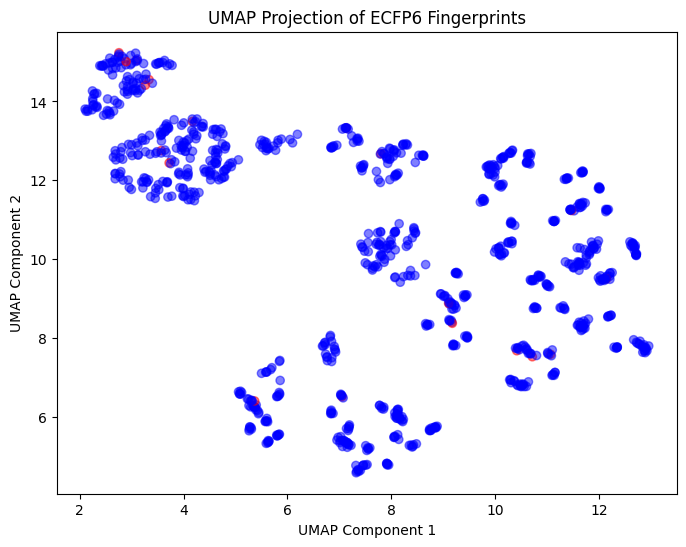

In [43]:
# Visualize the data with the color map
plt.figure(figsize=(8, 6))
plt.scatter(umap_projection[:, 0], umap_projection[:, 1], c=colors, alpha=0.5)
plt.title('UMAP Projection of ECFP6 Fingerprints')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [26]:
# Create a new DataFrame with the UMAP projection coordinates and additional information
umap_df = pd.DataFrame(umap_projection, columns=['UMAP1', 'UMAP2'])
umap_df['Color'] = colors
umap_df['Index'] = df.index
umap_df['SMILES'] = df['smiles']  # Assuming 'smiles' is the column name containing SMILES strings

In [27]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [28]:
import plotly.express as px

In [29]:
# Create an interactive plot using Plotly
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Color',
                 hover_data={'Index': True, 'SMILES': True, 'Color': False},
                 title='Interactive UMAP Projection')

In [30]:
# Define the range of min_dist and n_neighbors values to explore
min_dist_values = [0.1, 0.5, 1.0]
n_neighbors_values = [5, 10, 15]

In [31]:
# Update the hover tooltip
fig.update_traces(hovertemplate='Index: %{customdata[0]}<br>SMILES: %{customdata[1]}')

In [32]:
# Set the background color to transparent
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

In [33]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import plotly.express as px
from rdkit import Chem
from rdkit.Chem import Draw
import io
import base64
from IPython.display import display, HTML, Image

# Function to generate chemical structure images for each SMILES string
def generate_structure_image(smiles):
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(300, 300))
    buffer = io.BytesIO()
    img.save(buffer, format='PNG')
    return base64.b64encode(buffer.getvalue()).decode('utf-8')

# Create a new DataFrame with the UMAP projection coordinates and additional information
umap_df = pd.DataFrame(umap_projection, columns=['UMAP1', 'UMAP2'])
umap_df['Color'] = colors
umap_df['Index'] = df.index
umap_df['SMILES'] = df['smiles']

# Create an interactive plot using Plotly Express
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Color',
                 hover_data={'Index': True, 'SMILES': True, 'Color': False},
                 title='Interactive UMAP Projection')

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
# Show the interactive plot
fig.show()

# Function to display chemical structure
def show_structure(index):
    smiles = umap_df.loc[index, 'SMILES']
    img_base64 = generate_structure_image(smiles)
    display(HTML(f"<h3>Structure for Index {index}</h3>"))
    display(HTML(f"<p>SMILES: {smiles}</p>"))
    display(Image(data=base64.b64decode(img_base64)))

# Instructions for the user
print("To view the chemical structure for a specific point:")
print("1. Hover over a point to see its Index and SMILES.")
print("2. Run the following command in a new cell, replacing INDEX with the desired index number:")
print("   show_structure(INDEX)")

To view the chemical structure for a specific point:
1. Hover over a point to see its Index and SMILES.
2. Run the following command in a new cell, replacing INDEX with the desired index number:
   show_structure(INDEX)


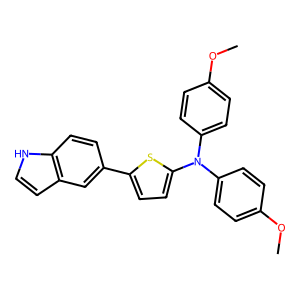

In [36]:
show_structure(352)